In [2]:
import pandas as pd

In [3]:
df = pd.read_csv ("croped_filter_expanded_data.csv")

In [85]:
df["path"]

0         ./Dataset-copy/imdb_faces/imdb_crop/65/nm09249...
1         ./Dataset-copy/imdb_faces/imdb_crop/04/nm00004...
2         ./Dataset-copy/imdb_faces/imdb_crop/23/nm00003...
3         ./Dataset-copy/imdb_faces/imdb_crop/40/nm03260...
4         ./Dataset-copy/imdb_faces/imdb_crop/54/nm00003...
                                ...                        
371220    ./Dataset-copy/imdb_faces/imdb_crop/18/nm00000...
371221    ./Dataset-copy/imdb_faces/imdb_crop/83/nm02201...
371222    ./Dataset-copy/imdb_faces/imdb_crop/12/nm09146...
371223    ./Dataset-copy/imdb_faces/imdb_crop/46/nm02210...
371224    ./Dataset-copy/imdb_faces/imdb_crop/26/nm01210...
Name: path, Length: 371225, dtype: object

In [4]:
import matplotlib.pyplot as plt
import cv2
from tqdm.auto import tqdm
import csv

In [87]:
img1 = cv2.imread(df["path"][1])
img2 = cv2.imread(df["path"][20])

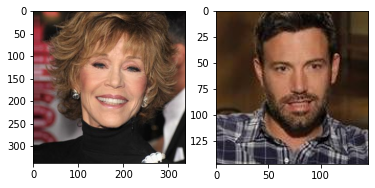

In [88]:
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [89]:
print(img1.shape, img2.shape)

(338, 338, 3) (147, 146, 3)


In [90]:
img1_x = cv2.resize(img1, (64, 64 ))
img2_x = cv2.resize(img2, (64,64))

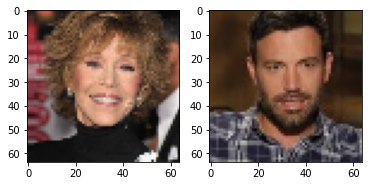

In [91]:
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img1_x, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img2_x, cv2.COLOR_BGR2RGB))

In [92]:
df_cut = df

In [93]:
df_cut

,path,out_ages,out_genders,face_scores,x,y,w,h
0,./Dataset-copy/imdb_faces/imdb_crop/65/nm09249...,20,0,5.305110,95,86,265,265
1,./Dataset-copy/imdb_faces/imdb_crop/04/nm00004...,72,0,4.461523,91,54,186,186
2,./Dataset-copy/imdb_faces/imdb_crop/23/nm00003...,79,1,2.683944,104,116,217,217
3,./Dataset-copy/imdb_faces/imdb_crop/40/nm03260...,42,1,4.495562,85,54,159,159
4,./Dataset-copy/imdb_faces/imdb_crop/54/nm00003...,35,1,4.179086,104,73,328,328
...,...,...,...,...,...,...,...,...
371220,./Dataset-copy/imdb_faces/imdb_crop/18/nm00000...,93,1,4.379371,133,85,268,268
371221,./Dataset-copy/imdb_faces/imdb_crop/83/nm02201...,22,0,3.188025,68,70,216,216
371222,./Dataset-copy/imdb_faces/imdb_crop/12/nm09146...,17,0,1.243405,13,14,49,49
371223,./Dataset-copy/imdb_faces/imdb_crop/46/nm02210...,27,0,4.787389,59,39,167,167


In [94]:
len(df_cut["out_ages"].value_counts())

97

In [95]:
dataframe_32 = pd.DataFrame(columns=df.columns)

In [96]:
dataframe_64 = pd.DataFrame(columns=df.columns)

In [97]:
dataframe_32.to_csv("imdb_faces_data_32x32.csv", index_label=False)
dataframe_64.to_csv("imdb_faces_data_64x64.csv", index_label=False)

In [98]:
df_cut_tqdm = tqdm(df_cut)

In [100]:
def Get_Croped_image(img,bb_data):
    img_shape = img.shape
    x = bb_data[0]
    y = bb_data[1]
    w = bb_data[2]
    h = bb_data[3]
    crop_img = img[y:y+h, x:x+w]
    return crop_img


def read_and_resize(image, bb_data, input_shape=(224,224),aug=False):
    #filepath = image_data.path.values[0]
    #for index in dataFrame.index :
    im_cv = image
    im_cv = Get_Croped_image(im_cv,bb_data)
    im_cv = cv2.resize(im_cv,input_shape)
    #im_array = np.array(im_cv)
    #im_cv = np.array(im_array / (np.max(im_array)+ 0.001), dtype="float32")
    #images.append(im_cv)
    return im_cv





paths = df_cut["path"]
bb_boxes = [df_cut["x"], df_cut["y"], df_cut["w"], df_cut["h"]]
paths_tqdm = tqdm(paths)
with open("imdb_faces_data_32x32.csv", "w") as file_32:
    
    df_writer = csv.writer(file_32)
    #next(file_32)
    
    for index, path in enumerate(paths_tqdm):
    
        img = cv2.imread(path)
        df_series = df_cut.loc[index]
        bb_data = [df_series[4], df_series[5], df_series[6], df_series[7]]
        img = read_and_resize(img, bb_data, input_shape=(32,32))
        
        img_name = str(index) + '.jpg'
        folder_path = './imdb_images_32x32/'
        img_data = []
        img_path = folder_path + img_name
        img_gender = df_series[2]
        img_age = df_series[1]
        img_data.append(img_path)
        img_data.append(img_age)
        img_data.append(img_gender)
        
        cv2.imwrite(img_path, img)
        df_writer.writerow(img_data)

In [102]:
paths_tqdm = tqdm(paths)
   
with open("imdb_faces_data_64x64.csv", "w") as file_64:
    
    df_writer = csv.writer(file_64)
        
        
    for index, path in enumerate(paths_tqdm):
    
        img = cv2.imread(path)
        df_series = df_cut.loc[index]
        bb_data = [df_series[4], df_series[5], df_series[6], df_series[7]]
        img = read_and_resize(img, bb_data, input_shape=(64, 64))
        
        img_name = str(index) + '.jpg'
        folder_path = './imdb_images_64x64/'
        img_data = []
        img_path = folder_path + img_name
        img_gender = df_series[2]
        img_age = df_series[1]
        img_data.append(img_path)
        img_data.append(img_age)
        img_data.append(img_gender)
        
        cv2.imwrite(img_path, img)
        df_writer.writerow(img_data)
        

In [103]:
cols = ['path', 'age', 'gender']

df_32 = pd.read_csv("imdb_faces_data_32x32.csv", names=cols)
df_64 = pd.read_csv("imdb_faces_data_64x64.csv", names=cols)
df_32.to_csv("imdb_faces_data_32x32.csv", index=False)
df_64.to_csv("imdb_faces_data_64x64.csv", index=False)

In [38]:
df_cut[1:2]

,path,out_ages,out_genders,face_scores,x,y,w,h
1,./Dataset-copy/imdb_faces/imdb_crop/04/nm00004...,72,0,4.461523,91,54,186,186


In [62]:
df_cut.loc[1][1]

72

In [63]:
img = []
img.append([1,2,3,4])

In [64]:
img

[[1, 2, 3, 4]]

In [104]:
import matplotlib.pyplot as plt

df_32 = pd.read_csv("imdb_faces_data_32x32.csv")
df_64 = pd.read_csv("imdb_faces_data_64x64.csv")
paths_32 = df_32["path"]
paths_64 = df_64["path"]
index = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


72


KeyboardInterrupt: 

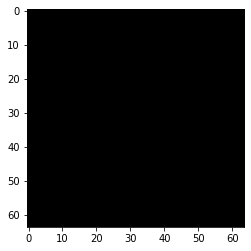

In [31]:
for index in range(len(df_64)):
    
    img1 = (cv2.imread(paths_32[index]).astype("float32")/255.0) - 0.5
    img2 = (cv2.imread(paths_64[index]).astype("float32")/255.0) - 0.5

#     plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img1+0.5, cv2.COLOR_BGR2RGB))
#     plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img2+0.5, cv2.COLOR_BGR2RGB))
    index = index+1
    age = df_64.loc[index][1]


    img2_x = (img2/255.0).astype("float32") - 0.5
    plt.subplot(1,1,1); plt.imshow(cv2.cvtColor(img2_x+0.5, cv2.COLOR_BGR2RGB))
    cv2.imshow("img", img2_x+0.5)
    print(age)
    cv2.waitKey(0)

In [32]:
cv2.destroyAllWindows()

In [105]:
index = 
img1 = cv2.imread(paths_32[index])
img2 = cv2.imread(paths_64[index])

plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

SyntaxError: invalid syntax (<ipython-input-105-952e65950e3f>, line 1)

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm.auto import tqdm
import csv
import numpy as np

In [3]:
df = pd.read_csv("imdb_faces_data_64x64.csv")
df = df[0:700]

In [4]:
len(df)

700

In [5]:
df_train, df_test = df[0:500], df[500:600]

In [6]:
(df_test.columns)

Index(['path', 'age', 'gender'], dtype='object')

In [7]:
ages_train = df["age"]/100
img_train = []#np.empty((1,64,64,3))

In [70]:
ages_train = df["gender"]
img_train = []#np.empty((1,64,64,3))

In [71]:
len(df)

700

In [72]:
for index, img_path in enumerate(df["path"]):
    img = cv2.imread(img_path)
    #img = np.expand_dims(img, axis=0)
    img_mod = (img.astype("float32")/255.0) - 0.5
    img_train.append(img_mod)
    

In [73]:
img_train = np.array(img_train)

In [74]:
img_train.shape

(700, 64, 64, 3)

In [75]:
ages_train_x = ages_train.to_numpy()

In [76]:
img_tr, img_tes, age_tr, age_tes = img_train[0:600],img_train[600:], ages_train_x[0:600], ages_train_x[600:]

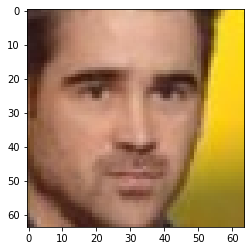

In [77]:
plt.imshow(cv2.cvtColor(img_train[8]+0.5, cv2.COLOR_BGR2RGB))

In [15]:
ages_train[8]*100

30.0

In [16]:
index=0

In [17]:
def disp_img(img_train,ages_train, index):
    plt.imshow(cv2.cvtColor(img_train[index]+0.5, cv2.COLOR_BGR2RGB))
    print(ages_train[index])
#index+=1

In [18]:
index = 89

0.41


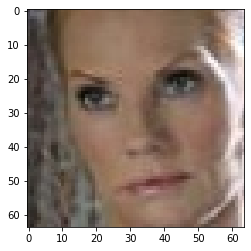

In [19]:
disp_img(img_tr, age_tr, index)
index += 1

In [20]:
index = 0

0.57


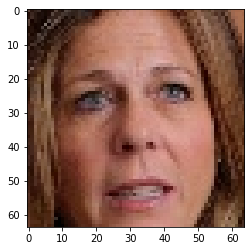

In [21]:
disp_img(img_tes, age_tes, index)
index += 1

In [22]:
ages_train[0:][0]

0.2

In [23]:
import logging
 
import datetime
import pandas as pd
import os
import warnings

from PIL import Image
import numpy as np
from numpy import save, load

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, \
    GlobalMaxPool2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, Lambda, Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard

import cv2

from tqdm import tqdm
from collections import Counter

In [24]:
# def get_model(optimizer,n_classes=1):

#     base_model = ResNet50(weights="./resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False)

#     #for layer in base_model.layers:
#     #    layer.trainable = False

#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dropout(0.2)(x)
#     #x = Flatten()
#     x = Dense(1000, activation="relu")(x)
#     x = Dropout(0.2)(x)
#     x = Dense(750,activation="relu")(x)
#     x = Dense(350,activation="relu")(x)
#     x = Dense(100,activation="relu")(x)
#     x = Dropout(0.2)(x)
#     x = Dense(1, activation="sigmoid")(x)

#     base_model = Model(base_model.input, x, name="base_model")

#     base_model.compile(loss="sparse_categorical_crossentropy", metrics=['acc'], optimizer=optimizer)

#     return base_model

In [110]:
def get_model(optimizer,n_classes=1):
    model = keras.Sequential()
#     model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#     model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#     model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(Input(shape=(64,64,3)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(512, activation='relu'))
    #model.add()
    #model.add(Dense(47150, activation = 'relu'))
    #model.add(Dense(47150/2, activation = 'relu'))
    #model.add(Dense(47150/4, activation = 'relu'))
    #model.add(Dense(47150/8, activation = 'relu'))
    #model.add(Dense(n_classes, activation = 'softmax'))
        

    model.add(Dense(n_classes, activation="sigmoid"))#(x)
    #base_model = Model(base_model.input, x, name="base_model")
    model.compile(loss="mean_squared_error", metrics=['acc'], optimizer=optimizer)

    return model

In [111]:
if __name__ == "__main__":
    
    optimizer = Adam(lr=0.01)
    model = get_model(optimizer)
    
    model.fit(x=img_tr, y=age_tr, batch_size=1, epochs=20, verbose=1, validation_split=0.1)
    

Train on 540 samples, validate on 60 samples
Epoch 1/20
540/540 [==============================] - 16s 30ms/sample - loss: 0.4393 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epoch 2/20
540/540 [==============================] - 16s 29ms/sample - loss: 0.4389 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epoch 3/20
540/540 [==============================] - 16s 29ms/sample - loss: 0.4389 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epoch 4/20
540/540 [==============================] - 16s 29ms/sample - loss: 0.4389 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epoch 5/20
540/540 [==============================] - 16s 29ms/sample - loss: 0.4389 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epoch 6/20
540/540 [==============================] - 16s 29ms/sample - loss: 0.4389 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epoch 7/20
540/540 [==============================] - 16s 29ms/sample - loss: 0.4389 - acc: 0.5611 - val_loss: 0.4833 - val_acc: 0.5167
Epo

In [ ]:
model.predict

In [79]:
index = 2

0


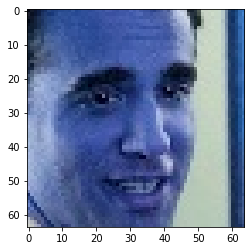

In [105]:
plt.imshow(img_tr[index]+0.5)
print(age_tr[index])
index+=1

In [83]:
img_tr.shape

(600, 64, 64, 3)

In [65]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 12545     
Total params: 31,937
Trainable params: 31,937
Non-trainable params: 0
_________________________________________________

In [66]:
64*64*3

12288